# Historiske stavemåder set ud fra DOD OCR korpus

Det Kgl. Bibliotek har produceret et datasæt af ocr-data fra de bøger, som de har indskannet siden 2012, og jeg overvejer, hvorvidt datasættet ville kunne anvendes til text mining, eftersom ocr-kvaliteten er af svingende kvalitetet. Bøgerne stammer fra begyndelsen af 1700tallet til slutningen af 1800tallet. Der er ocr-data fra knap 20.000 bøger inden for mange forskellige emner i datasættet.  

Datasættet hedder 'DOD OCR korpus 20210923' og kan downloades herfra: https://loar.kb.dk/handle/1902/7799

Da jeg kender lidt til pythonbiblioteket Pandas har jeg besluttet mig til at benyttet python afprøve til at afprøve om det er muligt anvende datasættet til meningssyldte undersøgelser. 

Jeg er uddannet inden for historie og ved, at ord tidligere har været stavet på flere forskellige måder, fordi egentlig retsstavning først blev introduceret i slutningen af 1800tallet. Man kan undre sig over, hvorfor en stavemåde er blevet kanoniseret som en 'rigtige' stavemåde frem for en anden stavemåde. Jeg er nysgerrig for at finde ud af om, jeg kan bruge datasættet i en visuel undersøgelse af, hvordan forskellige historiske stavemåderne fordeler sig i forhold til hinanden fra begyndelsen af 1700tallet til slutningen af 1800tallet.

Jeg forventer ikke, at den visualisering, som jeg vil producere giver mig svaret på, hvorfor den ene stavemåde er blevet valgt, som den rigtige, frem for den anden, men jeg regner med, at jeg ville kunne benytte den til at få et bedre indblik i nogle overordnede mønstre.    

Jeg får brug for tre biblioteker.

In [7]:
# til navigation
import os

# til databehandling 
import pandas as pd
import time

# Hent data

Jeg henter de tekster, der liiger i txt filer med en byte size større end 10.000, fordi nogle txt filer indeholder meget lidt data. Disse txt filer er jeg interesseret i at kunne sortere fra. Jeg har valgt at sætte en grænse ved en byte size større end 10.000 bytes, men grænsen kunne også ligge et andet sted. 

Txtfilerne er navngivet med en stregkode, som biblioteket har tilføjet til den bog, som ocr-data'en stammer fra. Disse strengkoder gemmer jeg i lister, som jeg gemmer i variabler, som jeg navngiver med 'barcodes' og en temporalafgrænsning, der svarer til den filstruktur, som txt-filerne er leveret i.  

In [8]:
byte_size = 10000

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1700to1749')
files = os.listdir()
txt_files = [ i for i in files if i.endswith('.txt') if os.stat(i).st_size > byte_size ]
barcodes_1700to1749 = [ i[:-4] for i in txt_files ]

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1750to1799')
files = os.listdir()
txt_files = [ i for i in files if i.endswith('.txt') if os.stat(i).st_size > byte_size ]
barcodes_1750to1799 = [ i[:-4] for i in txt_files ]

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1800to1849')
files = os.listdir()
txt_files = [ i for i in files if i.endswith('.txt') if os.stat(i).st_size > byte_size ]
barcodes_1800to1849 = [ i[:-4] for i in txt_files ]

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1850to1899')
files = os.listdir()
txt_files = [ i for i in files if i.endswith('.txt') if os.stat(i).st_size > byte_size ]
barcodes_1850to1899 = [ i[:-4] for i in txt_files ]

barcodes_qualified = barcodes_1700to1749 + barcodes_1750to1799 + barcodes_1800to1849 + barcodes_1850to1899

print (len(barcodes_qualified), 'filer er kvalificeret.')

15355 filer er kvalificeret.


Det er værd at bemærke, at der eksisterer stor forskel på mængden af tekster i hver datasæt. 

In [9]:
print (len(barcodes_1700to1749))
print (len(barcodes_1750to1799))
print (len(barcodes_1800to1849))
print (len(barcodes_1850to1899))

1250
3582
5181
5342


Hvis jeg gerne vil sikre mig, at der er nogenlunde lige mange tekster i hver datasæt, så kan jeg vælge at lade det mindste datasæt forblive intakt, men tilpasse de tre andre datasæts længde, så de ikke er længere end det mindste. Dette kan jeg gøre ved at slice, f.eks. 'barcodes_1750to1799[0:1250]'.  

De fire datasæt kan jeg samle i en ny liste.

In [10]:
#barcodes_1700to1749 = barcodes_1700to1749
#barcodes_1750to1799 = barcodes_1750to1799[0:1250]
#barcodes_1800to1849 = barcodes_1800to1849[0:1250]
#barcodes_1850to1899 = barcodes_1850to1899[0:1250]

barcodes = barcodes_1700to1749 + barcodes_1750to1799 + barcodes_1800to1849 + barcodes_1850to1899

# spelling_counter funktion
Med henblik på at tælle forskellige stavemåder i teksterne skriver jeg en funktion, der kan tage en barcode og en liste med stavemåder.

Funktionen indlæser teksterne og for at sikre mig, at tekststykkerne er lige lange, tæller jeg kun forskellige stavemåder i de første 10000 tegn (jf. byte_size ovenfor).

Resultaterne bliver returneret som dataframes, hvor kolonnenavnene består i barcode samt stavemåderne og værdierne er barcodes og antal gange, stavemåderne optræder i teksterne.

In [11]:
def spelling_counter(barcode, spelling_list):
    # hent tekst
    open_file = open((barcode + '.txt'), 'r', encoding='utf-8-sig')
    text = open_file.read().lower()
    open_file.close()
    
    # tæl og tilfæj til dataframe 
    df_list= []
    for i in spelling_list:
        word = str(i)
        res = text.count(i)

        df1 = pd.DataFrame({word: [res]})
        df_list.append(df1)
        
    # saml dataframes    
    df2 = pd.concat(df_list, axis=1)
    df2.insert(loc=0, column='Barcode', value = barcode)
    return df2

Jeg skriver lister med forskellige stavemåder, som jeg kan indsætte i funktionen. Jeg er især interesseret i at inddrage ord som tidligere har indeholdt 'j' og 'i', f.eks. kærlighed, kiærlighed, kjærlighed, kierlighed eller kjerlighed, fordi jeg ved at denne slags ord har haft varierede stavemåder gennem tiden.

De forskellige stavemåder har jeg fundet ved at slå op på Ordbog over det danske Sprog (https://ordnet.dk/ods)

In [33]:
spelling_list1 = ['kærlighed', 'kiærlighed', 'kjærlighed', 'kierlighed', 'kjerlighed']
spelling_list2 = ['kær', 'kiær', 'kiar', 'kjar', 'kjer', 'kier']
spelling_list3 = ['gennem', 'gjennem', 'giemmen']
spelling_list4 = ['kjøbenhavn', 'kiøbenhavn', 'københavn', 'kopenhagen', 'Kiøbenhaffn', 'kiøbenhafn', 'kjöbenhavn']
spelling_list5 = ['spejl', 'speyl', 'spegel', 'spægel', 'speiel', 'speghæl', 'speil', 'spegill', 'spiegel']

Nedenfor benytter jeg funktionen og der sker tre ting. 1.programmet går til hver mappe med tekster. 2. åbner teksterne og tæller de forskellige stavemåder ved hjælp af funktionen. 3. De returnerede dataframes samles i fire dataframes, som modsvarer mappestrukturen.

In [13]:
# start timer
startTime = time.time()

# tilføj enten spelling_list1, 2, 3, 4 eller 5 nedenfor.
spelling_list = spelling_list4

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1700to1749')
df_1700to1749 = [ spelling_counter(barcode, spelling_list) for barcode in barcodes_1700to1749 ]
df_1700to1749 = pd.concat(df_1700to1749)

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1750to1799')
df_1750to1799 = [ spelling_counter(barcode, spelling_list) for barcode in barcodes_1750to1799 ]
df_1750to1799 = pd.concat(df_1750to1799)

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1800to1849')
df_1800to1849 = [ spelling_counter(barcode, spelling_list) for barcode in barcodes_1800to1849 ]
df_1800to1849 = pd.concat(df_1800to1849)

# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107\\1850to1899')
df_1850to1899 = [ spelling_counter(barcode, spelling_list) for barcode in barcodes_1850to1899 ]
df_1850to1899 = pd.concat(df_1850to1899)

# slut timer
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 217.83102893829346


Jeg samler de fire dataframes i en dataframe.

In [14]:
df_spelling = pd.concat([df_1700to1749, df_1750to1799, df_1800to1849, df_1850to1899])

In [15]:
df_spelling

,Barcode,spejl,speyl,spegel,spægel,speiel,speghæl,speil,spegill,spiegel
0,11010400677B,0,3,1,0,0,0,4,0,0
0,110104007294,0,0,0,0,0,0,0,0,0
0,110104007565,0,4,0,0,0,0,0,0,0
0,110104007572,0,0,0,0,0,0,3,0,0
0,110104007615,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0,4135818378,1,0,0,0,0,0,1,0,0
0,4135818386,1,0,0,0,0,0,14,0,0
0,4135818394,0,0,0,0,0,0,6,0,0
0,4996413670,0,0,0,0,0,0,0,0,0


For at få indblik i hvor ofte begrebet optræder i teksterne sammentæller jeg værdierne i kolonnerne og gemmer summen i en ny kolonne, som jeg kalder 'Sum'.

In [16]:
df_spelling['Sum'] = df_spelling.iloc[:, 1:].sum(axis=1)

In [17]:
df_spelling = df_spelling.reset_index(drop=True)

In [18]:
df_spelling

,Barcode,spejl,speyl,spegel,spægel,speiel,speghæl,speil,spegill,spiegel,Sum
0,11010400677B,0,3,1,0,0,0,4,0,0,8
1,110104007294,0,0,0,0,0,0,0,0,0,0
2,110104007565,0,4,0,0,0,0,0,0,0,4
3,110104007572,0,0,0,0,0,0,3,0,0,3
4,110104007615,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15350,4135818378,1,0,0,0,0,0,1,0,0,2
15351,4135818386,1,0,0,0,0,0,14,0,0,15
15352,4135818394,0,0,0,0,0,0,6,0,0,6
15353,4996413670,0,0,0,0,0,0,0,0,0,0


# Tilføj årstal
Jeg indlæser et Excel-ark med metadata for at 'merge' stregkoderne (barcodes) metadata om årstal og sprog. Disse metadata findes i dels i de marc filer, som findes i datasættet, dels i den Excelfil, der hedder 'AlmaExtractResult_3.xlsx'. Denne fil kan downloades herfra: https://github.com/KUBDatalab/dod_ocr_corpus_codes

In [24]:
# NB: Denne sti er tilpasset mit lokale miljø og skal ændres, hvis man vil genbruge denne kode
os.chdir('C:\\Users\\lakj\\data\\DOD_OCR_korpus_20220107')
df_metadata = pd.read_excel('AlmaExtractResult_3.xlsx')

Af metadata bruger jeg kolonnerne 'Year', 'Barcode' og 'Language'. Jeg bruger .isin() til at lave et subset af metadata baseret på listen af kvalificerede barcodes. Jeg konverter 'Year' fra datatypen float til datatypen int. Jeg merger metadata med stavevariationerne og dropper kolonnen 'Barcodes'. Jeg filtrer datasættet, så jeg kun har danske tekster og dropper herefter kolonnen 'Language' igen. 

In [25]:
df_metadata_year_barcode = df_metadata [['Year', 'Barcode', 'Language']]

df_metadata_barcode_filtered = df_metadata_year_barcode[df_metadata_year_barcode['Barcode'].isin(barcodes)].reset_index(drop=True) 

df_metadata_barcode_filtered['Year'] = df_metadata_barcode_filtered['Year'].astype(int)

df_spelling_year = df_metadata_barcode_filtered.merge(df_spelling, on='Barcode').drop(columns='Barcode')

df_spelling_year_lan = df_spelling_year[df_spelling_year['Language'] == 'dan']

df_spelling_year = df_spelling_year_lan.drop(columns='Language')

df_spelling_year

,Year,spejl,speyl,spegel,spægel,speiel,speghæl,speil,spegill,spiegel,Sum
0,1717,0,3,1,0,0,0,4,0,0,8
2,1741,0,4,0,0,0,0,0,0,0,4
3,1741,0,0,0,0,0,0,3,0,0,3
4,1742,0,0,0,0,0,0,0,0,0,0
5,1744,0,0,0,0,0,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
15376,1860,0,0,0,0,0,0,9,0,0,9
15377,1860,1,0,0,0,0,0,1,0,0,2
15378,1860,1,0,0,0,0,0,14,0,0,15
15379,1860,0,0,0,0,0,0,6,0,0,6


# Groupby year and .sum()

Jeg benytter Pandas groupby() metoden til at gruppere identiske data i en gruppe. Groupby() metoden returnerer et DataFrameGroupBy objekt, som indeholder aggregerede metoder som 'sum', 'mean' osv. For eksempel grupperer df.groupby(['Year']).sum() data i kolonnen 'Year' og beregner summen for alle numeriske kolonner. 

Nedenfor grupper jeg på 'Year', men jeg bruger pd.cut() til at inddele 'Year' i decader og 'sum' til at sammentælle tallene i hver dekade. Kollonen 'Year' er jeg ikke interesseret i at få summeret, så jeg bruger .drop() til at slette den.

In [26]:
df_spelling_year_decades = df_spelling_year.groupby( pd.cut(df_spelling_year['Year'], 
                                        bins= range(df_spelling_year['Year'].min() - 1, 
                                                    df_spelling_year['Year'].max()+1, 10) ) ).sum().drop(columns = 'Year')

Jeg kan nu undersøge spørgsmålet: Hvordan er den rå frekvens distribution af stavemåder set ud fra datasættet?

In [27]:
df_spelling_year_decades

,spejl,speyl,spegel,spægel,speiel,speghæl,speil,spegill,spiegel,Sum
Year,,,,,,,,,,
"(1699, 1709]",24,79,1,0,0,0,7,0,4,115
"(1709, 1719]",18,63,2,0,16,0,57,0,1,157
"(1719, 1729]",38,128,15,2,3,0,83,0,8,277
"(1729, 1739]",52,183,2,7,0,0,81,0,9,334
"(1739, 1749]",60,311,6,12,0,0,108,0,26,523
"(1749, 1759]",16,235,19,9,0,0,115,0,31,425
"(1759, 1769]",39,219,7,2,1,0,264,0,398,930
"(1769, 1779]",63,127,9,11,0,0,244,0,21,475
"(1779, 1789]",35,209,786,5,0,0,406,0,35,1476


<AxesSubplot:title={'center':'Udvikling i kærligheds historiske stavevariationer.'}, xlabel='Year'>

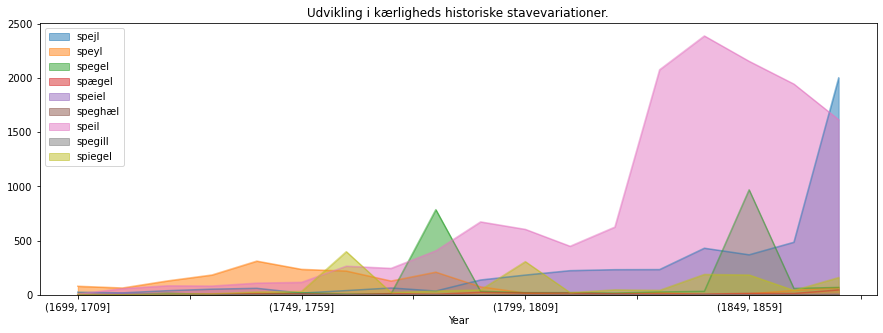

In [28]:
# Jeg benytter .iloc[:, :-1] for ikke at plotte kolonnen 'Sum'.
df_spelling_year_decades.iloc[:,:-1].plot.area(stacked=False, title='Udvikling i kærligheds historiske stavevariationer.', figsize=(15, 5))

For hver kolonne dividerer jeg værdierne i hver række med summen. Dette resulterer i en ny dataframe, hvor værdierne i hver række står i forhold til hianden.  

In [29]:
df_spelling_year_decades_ratio = df_spelling_year_decades.iloc[:, 0:-1].div(df_spelling_year_decades['Sum'], axis=0)

In [30]:
df_spelling_year_decades_ratio

,spejl,speyl,spegel,spægel,speiel,speghæl,speil,spegill,spiegel
Year,,,,,,,,,
"(1699, 1709]",0.208696,0.686957,0.008696,0.000000,0.000000,0.00000,0.060870,0.000000,0.034783
"(1709, 1719]",0.114650,0.401274,0.012739,0.000000,0.101911,0.00000,0.363057,0.000000,0.006369
"(1719, 1729]",0.137184,0.462094,0.054152,0.007220,0.010830,0.00000,0.299639,0.000000,0.028881
"(1729, 1739]",0.155689,0.547904,0.005988,0.020958,0.000000,0.00000,0.242515,0.000000,0.026946
"(1739, 1749]",0.114723,0.594646,0.011472,0.022945,0.000000,0.00000,0.206501,0.000000,0.049713
"(1749, 1759]",0.037647,0.552941,0.044706,0.021176,0.000000,0.00000,0.270588,0.000000,0.072941
"(1759, 1769]",0.041935,0.235484,0.007527,0.002151,0.001075,0.00000,0.283871,0.000000,0.427957
"(1769, 1779]",0.132632,0.267368,0.018947,0.023158,0.000000,0.00000,0.513684,0.000000,0.044211
"(1779, 1789]",0.023713,0.141599,0.532520,0.003388,0.000000,0.00000,0.275068,0.000000,0.023713


Jeg kan nu undersøge spørgmålet: Hvordan fordeler stavemåderne sig i forhold til hinanden set ud fra datasættet?

In [31]:
df_spelling_year_decades_ratio

,spejl,speyl,spegel,spægel,speiel,speghæl,speil,spegill,spiegel
Year,,,,,,,,,
"(1699, 1709]",0.208696,0.686957,0.008696,0.000000,0.000000,0.00000,0.060870,0.000000,0.034783
"(1709, 1719]",0.114650,0.401274,0.012739,0.000000,0.101911,0.00000,0.363057,0.000000,0.006369
"(1719, 1729]",0.137184,0.462094,0.054152,0.007220,0.010830,0.00000,0.299639,0.000000,0.028881
"(1729, 1739]",0.155689,0.547904,0.005988,0.020958,0.000000,0.00000,0.242515,0.000000,0.026946
"(1739, 1749]",0.114723,0.594646,0.011472,0.022945,0.000000,0.00000,0.206501,0.000000,0.049713
"(1749, 1759]",0.037647,0.552941,0.044706,0.021176,0.000000,0.00000,0.270588,0.000000,0.072941
"(1759, 1769]",0.041935,0.235484,0.007527,0.002151,0.001075,0.00000,0.283871,0.000000,0.427957
"(1769, 1779]",0.132632,0.267368,0.018947,0.023158,0.000000,0.00000,0.513684,0.000000,0.044211
"(1779, 1789]",0.023713,0.141599,0.532520,0.003388,0.000000,0.00000,0.275068,0.000000,0.023713


Nu har jeg samlet data til en visualisering, som kan indgå i en analyse.

<AxesSubplot:title={'center':'Udvikling i historiske stavevariationer.'}, xlabel='Year'>

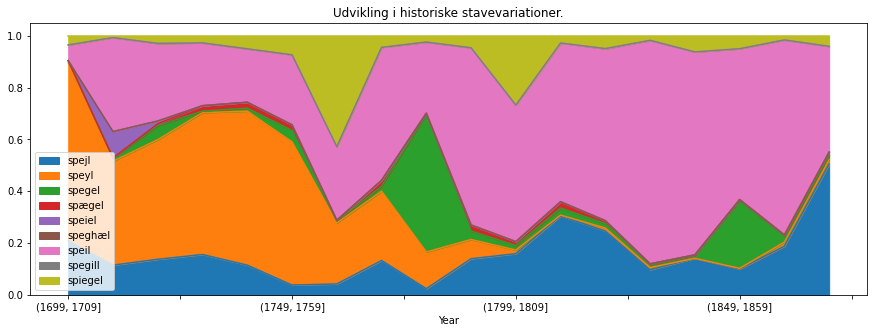

In [32]:
df_spelling_year_decades_ratio.plot.area(stacked=True, title='Udvikling i historiske stavevariationer.', figsize=(15, 5))

Jeg mener, at jeg kan benytte DOD OCR CORPUS til at få et bedre indblik i nogle overordnede mønstre, der gør sig gældende for historiske stavemåder, fordi der er relativt mange observationer, og de stammer fra knap cirka 15.000 bøger inden for mange forskellige emner (jf: '15355 filer er kvalificeret.' - se ovenfor).

Til trods for at ocr-dataen blot indeholder rester af den trykte tekst, så eksisterer de stavemåder, som jeg finder, når  ’tekstminer’ teksterne, men jeg anerkender, at hvis bøgerne blev indskannet igen og en ny og bedre ocr-teknologi vil blive anvendt, så ville jeg opnå et andet resultat.

Det er umuligt for mig at afgøre, hvor stor indvirkning datasættes ocr-kvalitet har på resultatet, fordi der eksisterer ikke en undersøgelse af ocr-kvaliteten, som jeg ville kunne inddrage.

Som Det Kgl. Bibliotek skriver:

_Den automatisk OCR genererede tekst er produceret efter bedste standarder for automatiseret OCR genkendelse i KB’s digitaliseringsafdeling. OCR teksterne er ikke efterbehandlet eller korrekturlæst efterfølgende og kvalitetsniveauet af OCR-genkendelsen er ikke systematisk undersøgt. (https://loar.kb.dk/handle/1902/7798)_

Jeg vil nu gentage koden og undersøge, hvordan fordelingen af stavemåder er for et andet ord.